# OBJECTIF : 

Ce script permet de récupérer les données du fichier donnees floraison à savoir le nombre de nouvelles inflos, d'inflos vivantes et mortes à chaque date de relevé. On fait des graphes. 

## Importation des librairies

In [3]:
library (plyr)
library (dplyr)
library (readr)
##library (xlsxjars)
##library (xlsx)
##library (rJava)
library(lubridate)
#library (float)
library(tidyverse)
library(magrittr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0     ✔ purrr   0.3.0
✔ tibble  2.0.1     ✔ stringr 1.4.0
✔ tidyr   0.8.2     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::arrange()         masks plyr::arrange()
✖ lubridate::as.difftime() masks base::as.difftime()
✖ purrr::compact()         masks plyr::compact()
✖ dplyr::count()           masks plyr::count()
✖ lubridate::date()        masks base::date()
✖ dplyr::failwith()        masks plyr::failwith()
✖ dplyr::filter()          masks stats::filter()
✖ lubridate::here()        masks plyr::here()
✖ dplyr::id()              masks plyr::id()
✖ lubridate::intersect()   masks base::intersect()
✖ dplyr::lag()             masks stats::lag()
✖ dplyr::mutate()          masks plyr::mutate()
✖ dplyr::rename()          masks plyr::rename()
✖ lubridate::setdiff()     masks base::setdiff()
✖ dplyr::summarise()       masks plyr::summarise()
✖ dp

## On se place dans le fichier donnees floraison

In [6]:
# Lecture du fichier données floraison
## databis = read.table(file = "../Fichiers de donnees/Donnees brutes/donnees.floraison.csv",header=TRUE,sep=";")
databis <- read_csv2("/home/bastien/Stage/Moi/donnees.floraison.csv")

Using ',' as decimal and '.' as grouping mark. Use read_delim() for more control.
Parsed with column specification:
cols(
  .default = col_character(),
  Bloc = col_double(),
  Arbre = col_double(),
  UC = col_double(),
  Annee = col_double(),
  UCmort = col_double(),
  BGterm = col_double(),
  Nbinflo = col_double(),
  NbUCfille = col_double(),
  NbFruit = col_double(),
  Lat2mort = col_logical(),
  Lat4NAture = col_logical(),
  Lat4mort = col_logical(),
  Lat5NAture = col_logical(),
  Lat5mort = col_logical(),
  Lat6NAture = col_logical(),
  Lat6dateC = col_logical(),
  Lat6mort = col_logical(),
  Lat6dateM = col_logical(),
  Lat7NAture = col_logical(),
  Lat7dateC = col_logical()
  # ... with 10 more columns
)
See spec(...) for full column specifications.
Warning message:
“1 parsing failure.
 row        col           expected actual                                            file
1104 Lat4NAture 1/0/T/F/TRUE/FALSE     BG '/home/bastien/Stage/Moi/donnees.floraison.csv'
”

## Fonction de récupération des données

In [18]:
# La fonction suivante renvoie un dataframe et le met dans un fichier excel

donnees_floraison = function (Bloc, Trait, Modalité, Nom) {
    
    # Arguments en entrée :
        ## Bloc : Un entier 1 ou 2 pour désigner le bloc choisi
        ## Trait : Un entier 0 ou 1. 0 si on veut désigner la parcelle en entier. 1 si on désigne 
        ##               une sous-parcelle/modalité
        ## Modalité : Si Trait vaut1, Modalité est une chaine de caractère "bache", "enh_haut" ou "enh_ras"
        ## Nom : Chaine de caractère pour choisir le nom du fichier excel sur lequel on écrit
    
    # Sortie : Un dataframe
    
    data1 = databis
    if (Bloc!=0)
        data1 = data1[data1$Bloc==Bloc,]
    if (Trait!=0)
        data1 = data1[data1$Traitm==Modalité,]
    # On ne garde que les lignes contenant des dates de naissance d'inflos 
    # (c'est à dire les lignes contenant une date de stade C)
    dataAp = data1[data1$ApdateC!="" & !is.na(data1$ApdateC),]
    dataAp = dataAp[, c(15,17)]
    colnames(dataAp) = c("birth","dead")
    dataLat1 = data1[data1$Lat1dateC!="" & !is.na(data1$Lat1dateC),]
    dataLat1 = dataLat1[,c(19,21)]
    colnames(dataLat1) = c("birth","dead")
    dataLat2 = data1[data1$Lat2dateC!="" & !is.na(data1$Lat2dateC),]
    dataLat2 = dataLat2[,c(23,25)]
    colnames(dataLat2) = c("birth","dead")
    dataLat3 = data1[data1$Lat3dateC!="" & !is.na(data1$Lat3dateC),] 
    dataLat3 = dataLat3[,c(27,29)]
    colnames(dataLat3) = c("birth","dead")
    dataLat4 = data1[data1$Lat4dateC!="" & !is.na(data1$Lat4dateC),]
    dataLat4 = dataLat4[,c(31,33)]
    colnames(dataLat4) = c("birth","dead")
    dataLat5 = data1[data1$Lat5dateC!="" & !is.na(data1$Lat5dateC),]
    dataLat5 = dataLat5[,c(35,37)]
    colnames(dataLat5) = c("birth","dead")
    dataLat6 = data1[data1$Lat6dateC!="" & !is.na(data1$Lat6dateC),]
    dataLat6 = dataLat6[,c(39,41)]
    colnames(dataLat6) = c("birth","dead")
    dataLat7 = data1[data1$Lat7dateC!="" & !is.na(data1$Lat7dateC),]
    dataLat7 = dataLat7[,c(43,45)]
    colnames(dataLat7) = c("birth","dead")
    dataLat8 = data1[data1$Lat8dateC!="" & !is.na(data1$Lat8dateC),]
    dataLat8 = dataLat8[,c(47,49)]
    colnames(dataLat8) = c("birth","dead")
    dataLat9 = data1[data1$Lat9dateC!="" & !is.na(data1$Lat9dateC),]
    dataLat9 = dataLat9[,c(51,53)]
    colnames(dataLat9) = c("birth","dead")
    data_ = rbind(dataAp,dataLat1,dataLat2,dataLat2,dataLat3,dataLat4,dataLat5,dataLat6,dataLat7,dataLat8,dataLat9)
    
    ##data_[,1] = as.Date(data_[,1], '%d/%m')
    ##data_[,2] = as.Date(data_[,2], '%d/%m')
    data_ %<>% mutate_at(c("birth", "dead"), list(as.Date))
    
    duree = cumsum(c(7,9,34))
    
    z = data_[,1] + duree[3] - 1
    
    diff = z - data_[,2]
    
    data_ = data.frame(data_,z,diff)

    date_ = sort(unique(c(data_[,1],data_[,2],as.Date("06/10","%d/%m"))))
    inflos_vivantes = array(0,length(date_))
    inflos_mortes = array(0,length(date_))
    inflos_nouvelles = array(0,length(date_))
    inflos_vivantes_theorie = array(0,length(date_))
    inflos_mortes_theorie = array(0,length(date_))
    inflos_CD_theo = array(0,length(date_))
    inflos_E_theo = array(0,length(date_))
    inflos_F_theo = array(0,length(date_))
    for (i in 1:dim(data_)[1]) {
        
        j = 1
        while (data_[i,1]>date_[j])
            j = j+1
        inflos_nouvelles[j] = inflos_nouvelles[j] + 1
        if (is.na(data_[i,2])) {
            inflos_vivantes[j:length(date_)] = inflos_vivantes[j:length(date_)] + 1
        }
        else {
            k = j 
            while (data_[i,2]>date_[k])
                k = k+1
            inflos_vivantes[j:k] = inflos_vivantes[j:k] + 1
            inflos_mortes[(k+1):length(date_)] = inflos_mortes[(k+1):length(date_)] + 1
        }
 
        if (data_[i,3]>date_[length(date_)]) {
            inflos_vivantes_theorie[j:length(date_)] = inflos_vivantes_theorie[j:length(date_)] + 1
            if ((j+duree[1]-1)<length(date_)) {
                inflos_CD_theo[j:(j+duree[1]-1)] = inflos_CD_theo[j:(j+duree[1]-1)] + 1
                if ((j+duree[2]-1)<length(date_)) {
                    inflos_E_theo[(j+duree[1]):(j+duree[2]-1)] = inflos_E_theo[(j+duree[1]):(j+duree[2]-1)] + 1
                    inflos_F_theo[(j+duree[2]):length(date_)] = inflos_F_theo[(j+duree[2]):length(date_)] + 1
                }
                else {
                    inflos_E_theo[(j+duree[1]):length(date_)] = inflos_E_theo[(j+duree[1]):length(date_)] + 1
                }
            }
            else {
                inflos_CD_theo[j:length(date_)] = inflos_CD_theo[j:length(date_)] + 1
            }
        }
        else {
            k = j 
            while (data_[i,3]>date_[k])
                k = k+1
            inflos_vivantes_theorie[j:k] = inflos_vivantes_theorie[j:k] + 1
            inflos_CD_theo[j:(j+duree[1]-1)] = inflos_CD_theo[j:(j+duree[1]-1)] + 1
            inflos_E_theo[(j+duree[1]):(j+duree[2]-1)] = inflos_E_theo[(j+duree[1]):(j+duree[2]-1)] + 1
            inflos_F_theo[(j+duree[2]):k] = inflos_F_theo[(j+duree[2]):k] + 1
            inflos_mortes_theorie[(k+1):length(date_)] = inflos_mortes_theorie[(k+1):length(date_)] + 1
        }
    }
    inflos_CD_theo = inflos_CD_theo[1:length(date_)]
    inflos_E_theo = inflos_E_theo[1:length(date_)]
    inflos_F_theo = inflos_F_theo[1:length(date_)]
    inflos_mortes = inflos_mortes[1:length(date_)]
    inflos_mortes_theorie = inflos_mortes_theorie[1:length(date_)]
    BB = data.frame(date_,inflos_nouvelles,inflos_vivantes,inflos_mortes,inflos_vivantes_theorie,inflos_mortes_theorie,inflos_CD_theo,inflos_E_theo,inflos_F_theo)
    colnames(BB) = c("date", "nouvelles", "vivantes", "mortes", "vivantes_theo", "mortes_theo", "CD_theo", "E_theo", "F_theo")
    write.csv(BB, paste0("../Fichiers de donnees/Donnees re organisees/Fichier donnees floraison/",Nom,".csv"))
    return (BB)
}

## Fonction d'affichage des données

In [8]:
plot_ = function (BB) {
    plot(BB[,1],BB[,3],type='l',col='red',xlab="Temps",ylab="Effectif",ylim=c(1,max(BB[,3],BB[,4],BB[,2])))
    lines(BB[,1],BB[,2],type='l',col='blue')
    lines(BB[,1],BB[,4],type='l',col='green')
    legend(BB[1,1],max(BB[,3],BB[,4],BB[,2]),legend=c("Vivantes","Nouvelles","Mortes"),col=c("red","blue","green"),lty=1:3)
    title ("Données relevées")
    
    plot(BB[,1],BB[,5],type='l',col='red',xlab="Temps",ylab="Effectif",ylim=c(1,max(BB[,2],BB[,5],BB[,6])))
    lines(BB[,1],BB[,2],type='l',col='blue')
    lines(BB[,1],BB[,6],type='l',col='green')
    legend(BB[1,1],max(BB[,2],BB[,5],BB[,6]),legend=c("Vivantes","Nouvelles","Mortes"),col=c("red","blue","green"),lty=1:3)
    title ("Données théoriques")
    
    m  = BB[,c(7,8,9)]
    m  = t(apply(m,1,cumsum))
    n1 = dim(m)[1]
    n2 = dim(m)[2]
    plot.new()
    plot.window(xlim=c(1,n1), ylim=c(min(m),max(m)))
    axis(1, 1:n1, BB[1:n1,1])
    axis(2)
    col = c("chartreuse1","yellow","coral")
    for (i in n2:1)
        polygon(c(1:n1,n1,1), c(m[,i],0,0), col=col[i])
    legend("topright", legend=c("CD","E","F"), fill=col)
    
    plot(BB[,1],BB[,5],type='l',col='red',xlab="Temps",ylab="Effectif",ylim=c(min(BB[,5]-BB[,3]),max(BB[,3],BB[,5])))
    lines(BB[,1],BB[,3],type='l',col='blue')
    lines(BB[,1],BB[,5]-BB[,3],type='l',col='green')
    legend(BB[1,1],max(BB[,3],BB[,5]),legend=c("Vivantes théoriques","Vivantes observées","Différences"),col=c("red","blue","green"),lty=1:3)
    title ("Comparaison")
}

## On récupère les données

In [19]:
Blocs_donnees_floraison = donnees_floraison(0, 0, "Modalité", "Blocs")
Blocs_bache_donnees_floraison = donnees_floraison(0, 1, "B", "Blocs_bache")
Blocs_enh_haut_donnees_floraison = donnees_floraison(0, 1, "E", "Blocs_enh_haut")
Blocs_enh_ras_donnees_floraison = donnees_floraison(0, 1, "Sn", "Blocs_enh_ras")
Bloc1_donnees_floraison = donnees_floraison(1, 0, "Modalité", "Bloc1")
Bloc1_bache_donnees_floraison = donnees_floraison(1, 1, "B", "Bloc1_bache")
Bloc1_enh_haut_donnees_floraison = donnees_floraison(1, 1, "E", "Bloc1_enh_haut")
Bloc1_enh_ras_donnees_floraison = donnees_floraison(1, 1, "Sn", "Bloc1_enh_ras")
Bloc2_donnees_floraison = donnees_floraison(2, 0, "Modalité", "Bloc2")
Bloc2_bache_donnees_floraison = donnees_floraison(2, 1, "B", "Bloc2_bache")
Bloc2_enh_haut_donnees_floraison = donnees_floraison(2, 1, "E", "Bloc2_enh_haut")
Bloc2_enh_ras_donnees_floraison = donnees_floraison(2, 1, "Sn", "Bloc2_enh_ras")

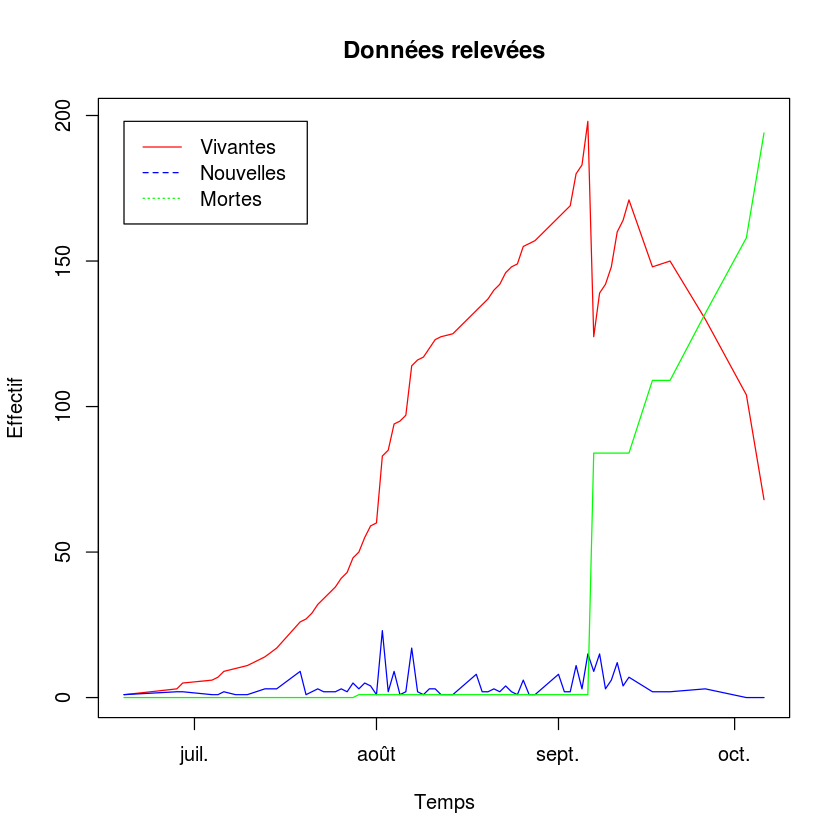

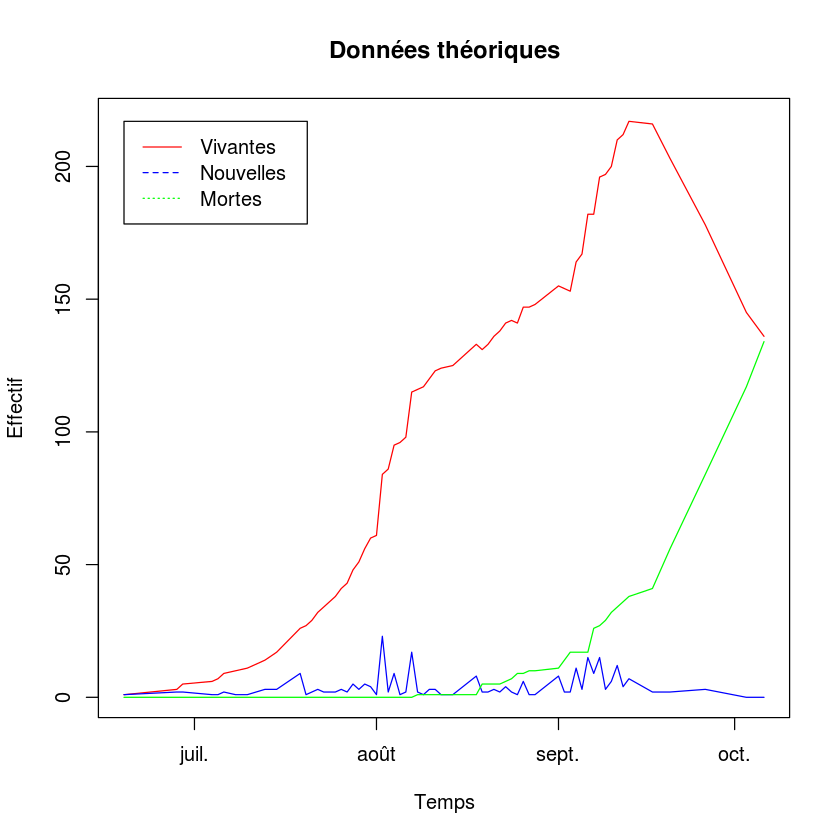

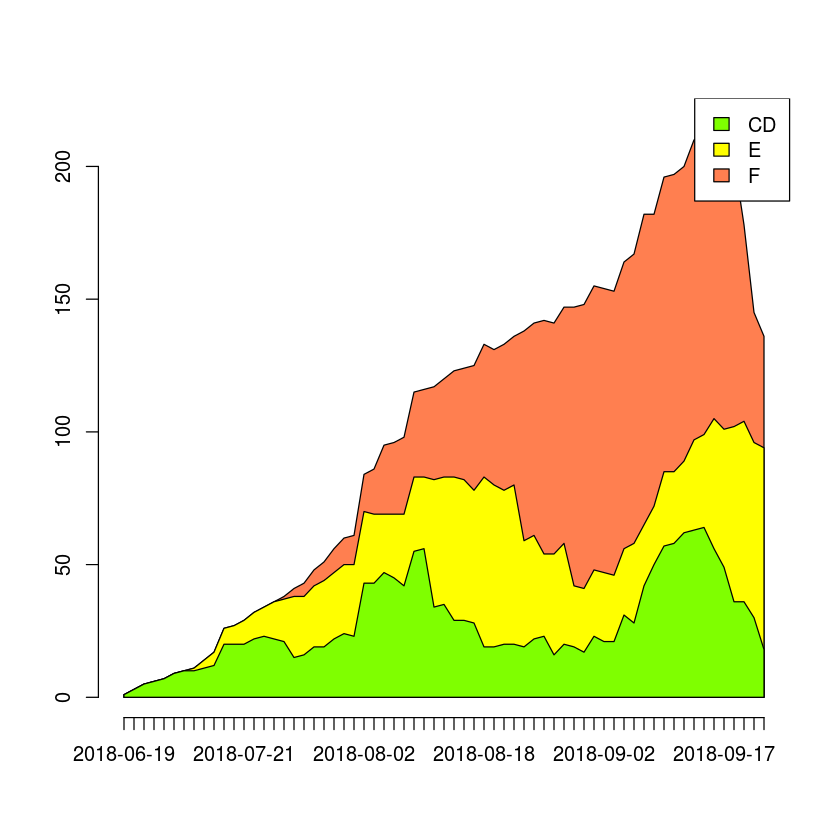

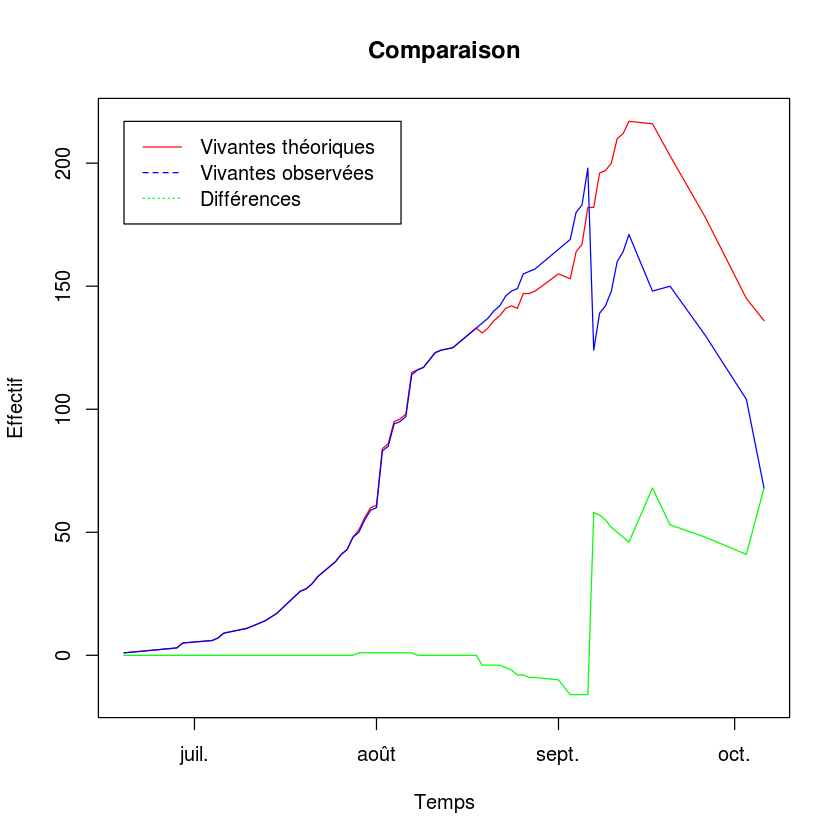

In [37]:
# BLOC 1 
plot_(Bloc1_donnees_floraison)

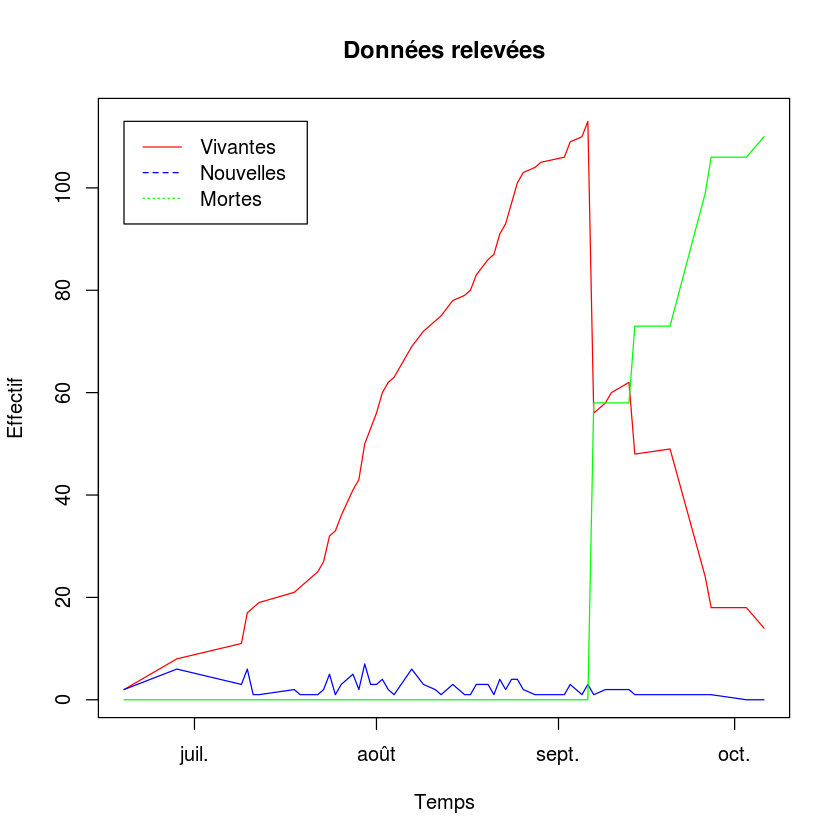

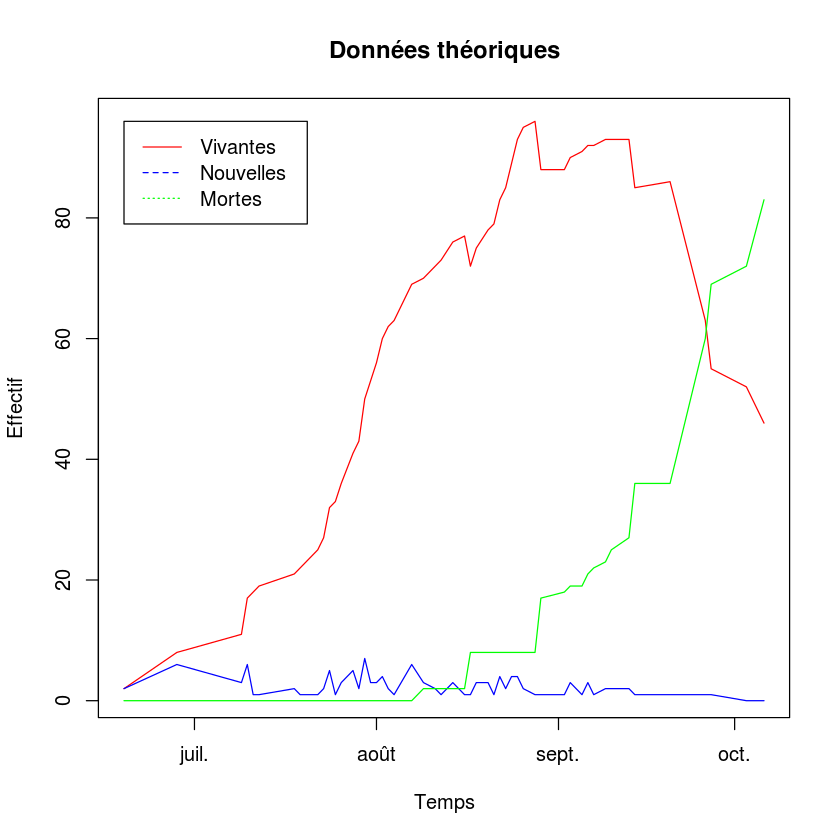

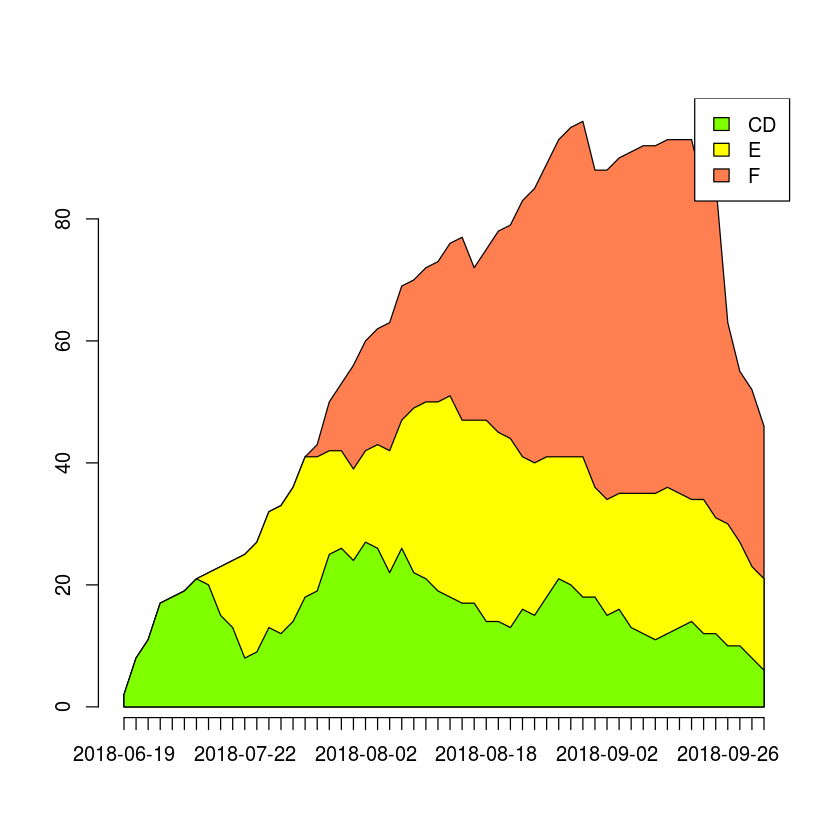

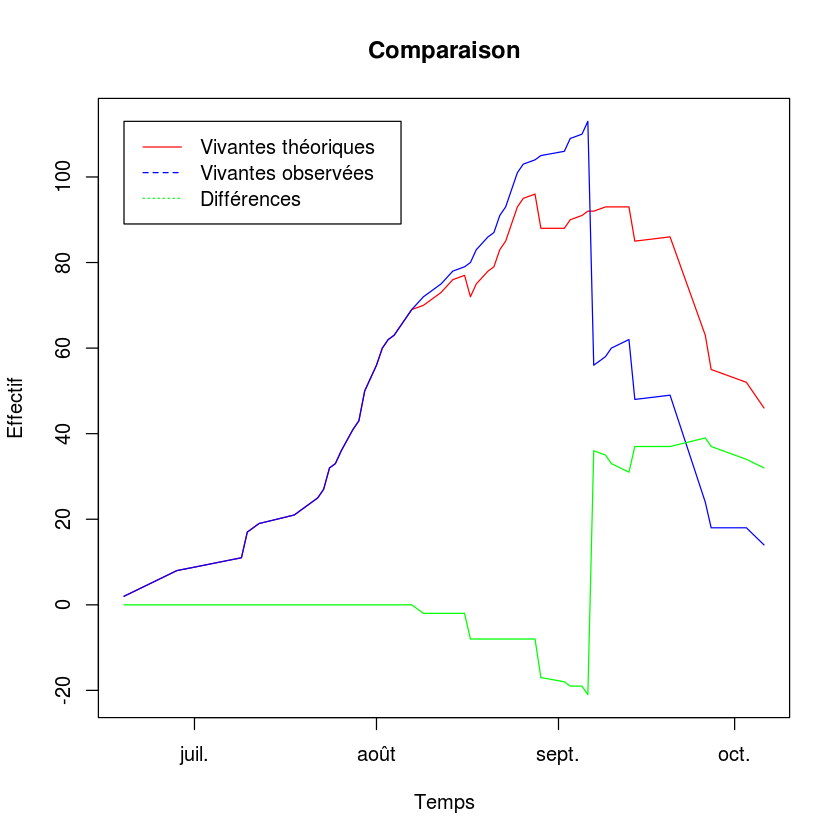

In [38]:
# BLOC 2 
plot_(Bloc2_donnees_floraison)

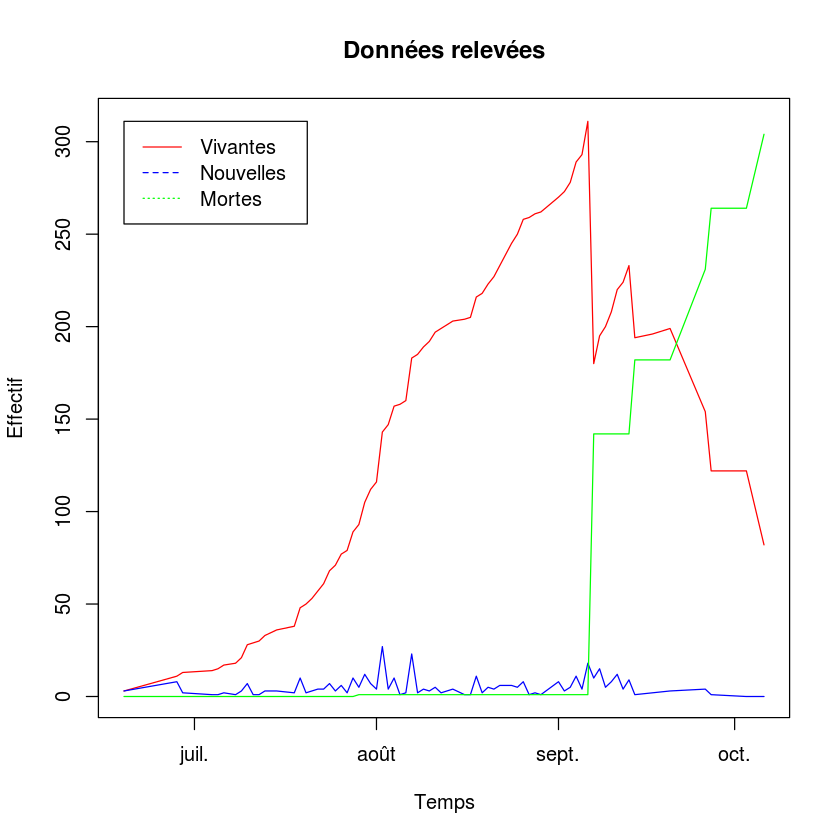

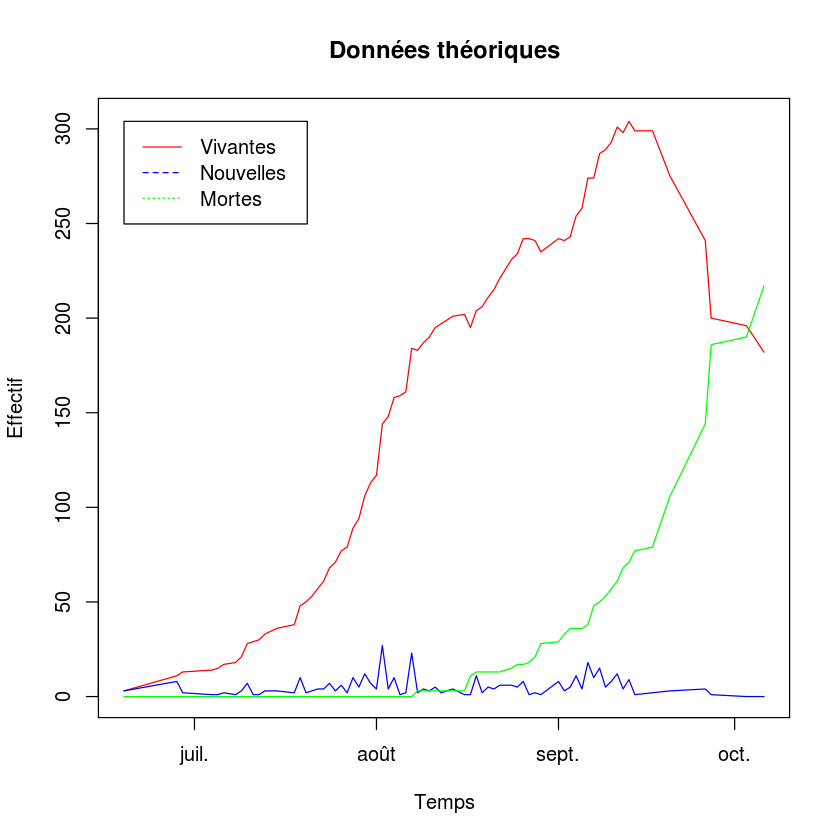

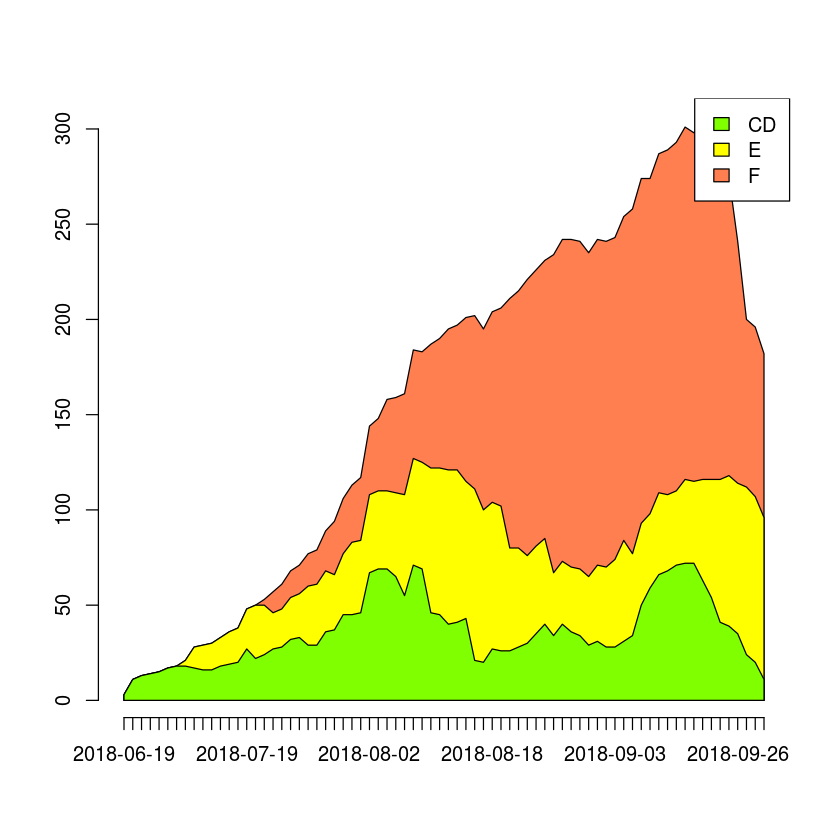

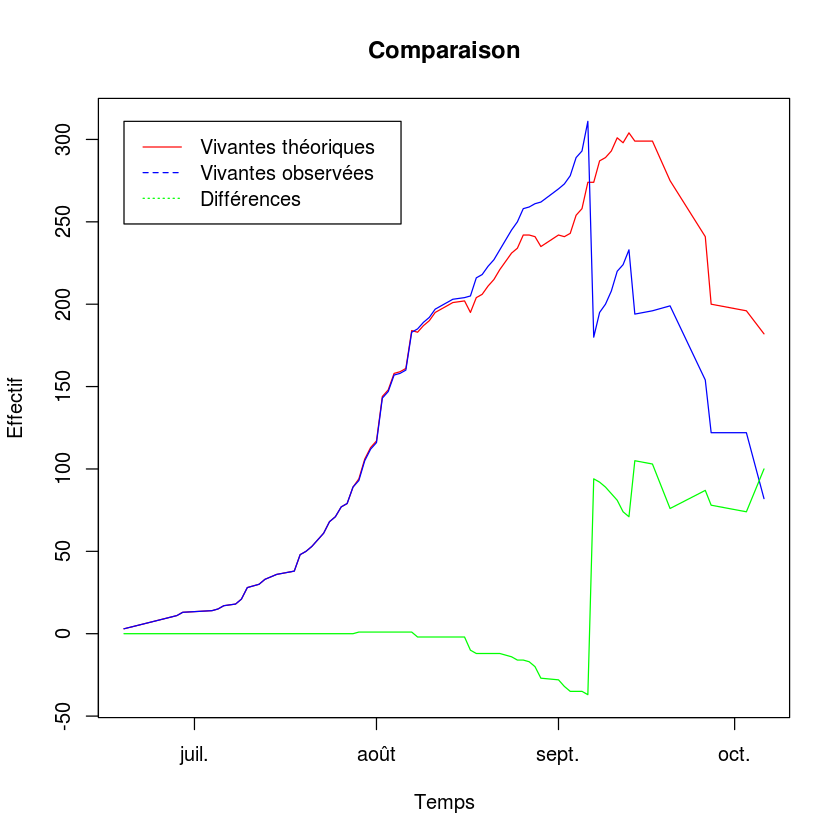

In [39]:
# BLOCS 1 et 2 
plot_(Blocs_donnees_floraison)

## Pareil mais données au jour

In [40]:
# La fonction suivante renvoie un dataframe et le met dans un fichier excel en estimant le nombre de larves piégées, 
# le nombre d'inflos vivantes et le nombre d'inflos mortes tous les jours

donnees_floraison_jour = function (Bloc, Nom) {
    
    
    # Arguments en entrée :
        ## Bloc : dataframe contenant les donnees aux dates de relevées
        ## Nom : Chaine de caractère pour choisir le nom du fichier excel sur lequel on écrit
    
    # On récupère les dates de relevés
    date_ = Bloc$date
    
    # On rentre le nombre de jours entre chaque relevé
    nb_jours = array(0, length(date)-1)
    for (i in 1:(length(date)-1))
        nb_jours[i] = date_[i+1]-date_[i]
    
    # Initialisation
    diff = date_[length(date_)]-date_[1]
    nouvelles = array(0, diff)
    vivantes = array(0, diff)
    mortes = array(0, diff)

    date = date_[1] + (0:diff)

    duree = cumsum(c(8,7,28))

    # On récupères les données pour chaque date de passage et on les transforme en données journalières
    
    vivantes[1] = Bloc$vivantes[1]
    mortes[1] = Bloc$mortes[1]
    nouvelles[1] = Bloc$nouvelles[1]
    ii = 2
    for (i in 2:length(date)) {
        
        if (date[i] %in% date_) {
            vivantes[i] = Bloc$vivantes[ii]
            mortes[i] = Bloc$mortes[ii]
            nouvelles[i] = Bloc$nouvelles[ii]
            ii = ii+1
        }
        
        else {
            vivantes[i] = vivantes[i-1]
            mortes[i] = mortes[i-1]
        }
    }

    BB = data.frame(date, nouvelles, vivantes, mortes)
    
    write.xlsx(BB, paste0("../Fichiers de donnees/Donnees re organisees/Fichier donnees floraison/",Nom,"_jour.xls"), sheetName="1")
    return (BB)
}

In [41]:
Blocs_donnees_floraison_jour = donnees_floraison_jour(Blocs_donnees_floraison, "Blocs")
Blocs_bache_donnees_floraison_jour = donnees_floraison_jour(Blocs_bache_donnees_floraison, "Blocs_bache")
Blocs_enh_haut_donnees_floraison_jour = donnees_floraison_jour(Blocs_enh_haut_donnees_floraison, "Blocs_enh_haut")
Blocs_enh_ras_donnees_floraison_jour = donnees_floraison_jour(Blocs_enh_ras_donnees_floraison, "Blocs_enh_ras")
Bloc1_donnees_floraison_jour = donnees_floraison_jour(Bloc1_donnees_floraison, "Bloc1")
Bloc1_bache_donnees_floraison_jour = donnees_floraison_jour(Bloc1_bache_donnees_floraison, "Bloc1_bache")
Bloc1_enh_haut_donnees_floraison_jour = donnees_floraison_jour(Bloc1_enh_haut_donnees_floraison, "Bloc1_enh_haut")
Bloc1_enh_ras_donnees_floraison_jour = donnees_floraison_jour(Bloc1_enh_ras_donnees_floraison, "Bloc1_enh_ras")
Bloc2_donnees_floraison_jour = donnees_floraison_jour(Bloc2_donnees_floraison, "Bloc2")
Bloc2_bache_donnees_floraison_jour = donnees_floraison_jour(Bloc2_bache_donnees_floraison, "Bloc2_bache")
Bloc2_enh_haut_donnees_floraison_jour = donnees_floraison_jour(Bloc2_enh_haut_donnees_floraison, "Bloc2_enh_haut")
Bloc2_enh_ras_donnees_floraison_jour = donnees_floraison_jour(Bloc2_enh_ras_donnees_floraison, "Bloc2_enh_ras")

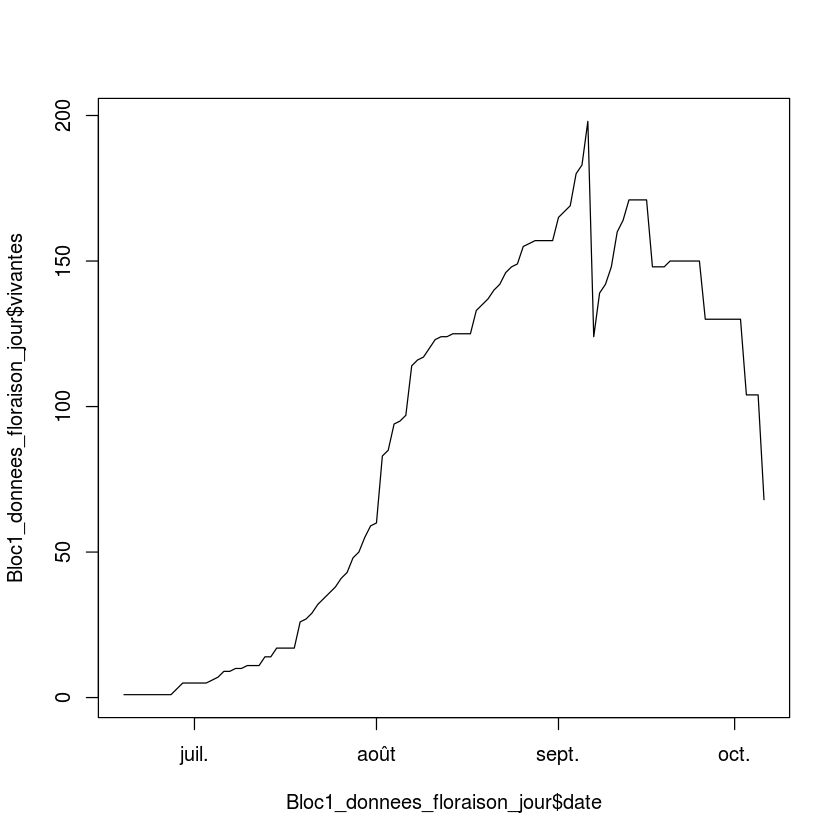

In [42]:
# BLOC 1 _ JOUR
plot(Bloc1_donnees_floraison_jour$date, Bloc1_donnees_floraison_jour$vivantes,type='l')

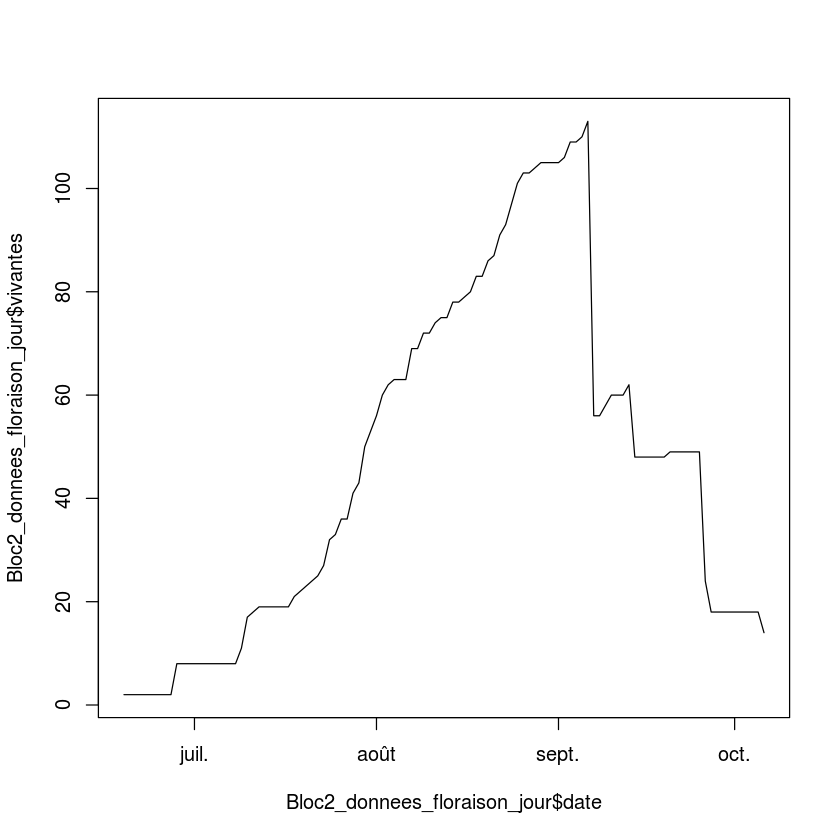

In [43]:
# BLOC 2 _ JOUR
plot(Bloc2_donnees_floraison_jour$date, Bloc2_donnees_floraison_jour$vivantes,type='l')

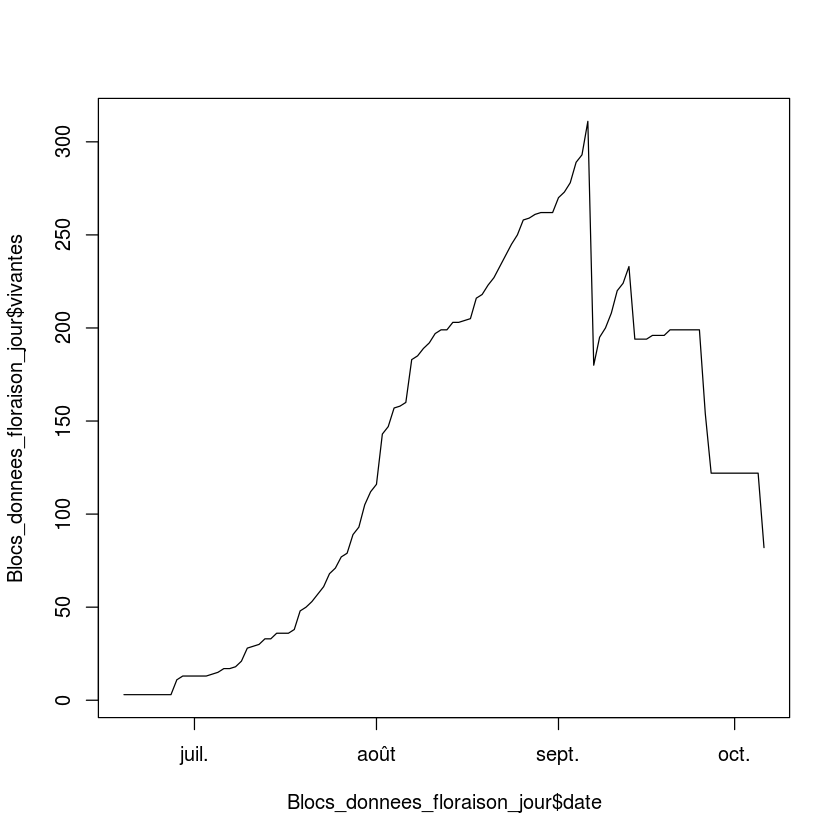

In [44]:
# BLOCS 1 et 2 _ JOUR
plot(Blocs_donnees_floraison_jour$date, Blocs_donnees_floraison_jour$vivantes,type='l')

## Pareil mais données deux fois par semaine

In [45]:
# La fonction suivante renvoie un dataframe et le met dans un fichier excel en estimant le nombre de larves piégées, 
# le nombre d'inflos vivantes et le nombre d'inflos mortes pour deux dates par semaine (le mardi et le vendredi)

donnees_floraison_semaine = function (Bloc, Nom) {
    
     # Arguments en entrée :
        ## Bloc : dataframe contenant les donnees aux dates de relevées
        ## Nom : Chaine de caractère pour choisir le nom du fichier excel sur lequel on écrit
    
    # On récupère les données du dataframe
    
    nouvelles_jour = Bloc$nouvelles
    vivantes_jour = Bloc$vivantes
    mortes_jour = Bloc$mortes
    date = Bloc$date
    
    # Dates qu'on impose, deux fois par semaine, le mardi et le vendredi
    date_ = c('20/06/2018','23/06/2018','27/06/2018','30/06/2018',
             '04/07/2018','07/07/2018','11/07/2018','14/07/2018','18/07/2018','21/07/2018','25/07/2018','28/07/2018',
             '01/08/2018','04/08/2018','08/08/2018','11/08/2018', '15/08/2018','18/08/2018','22/08/2018','25/08/2018','29/08/2018',
             '01/09/2018','05/09/2018','08/09/2018','12/09/2018','15/09/2018','19/09/2018','22/09/2018','26/09/2018','29/09/2018',
             '03/10/2018','06/10/2018')
    date_ = as.Date(date_, '%d/%m/%Y')
    date_ = as.Date(strptime(date_, format = "%Y-%m-%d"))
    
    debut = 1
    fin = length(date_)
    while (date_[debut]<date[1])
        debut = debut+1
    while (date_[fin]>date[length(date)])
        fin = fin-1
    date_ = date_[debut:fin]    
    
    nb_jours_ = c(0,rep(3:4,100),3)
    
    # Initialisation
    
    nouvelles = array(0, length(date_))
    vivantes = array(0, length(date_))
    mortes = array(0, length(date_))

    D = 1
    
    for (i in 1:length(date_)) {
        C = which(date_[i]==date)
        vivantes[i] = vivantes_jour[C]
        mortes[i] = mortes_jour[C]
        nouvelles[i] = sum(nouvelles_jour[D:(C-1)])
        D = C
    }
    
    # On met toutes les données récupérées dans un dataframe, puis dans un fichier excel
    date_ = as.Date(date_, '%d/%m/%Y')
    date = as.Date(strptime(date_, format = "%Y-%m-%d"))
    
    BB = data.frame(date, nouvelles, vivantes, mortes)
    write.xlsx(BB, paste0("../Fichiers de donnees/Donnees re organisees/Fichier donnees floraison/",Nom,"_semaine.xls"), sheetName="1")
    
    return (BB)
}

In [46]:
Blocs_donnees_floraison_semaine = donnees_floraison_semaine(Blocs_donnees_floraison_jour, "Blocs")
Blocs_bache_donnees_floraison_semaine = donnees_floraison_semaine(Blocs_bache_donnees_floraison_jour, "Blocs_bache")
Blocs_enh_haut_donnees_floraison_semaine = donnees_floraison_semaine(Blocs_enh_haut_donnees_floraison_jour, "Blocs_enh_haut")
Blocs_enh_ras_donnees_floraison_semaine = donnees_floraison_semaine(Blocs_enh_ras_donnees_floraison_jour, "Blocs_enh_ras")
Bloc1_donnees_floraison_semaine = donnees_floraison_semaine(Bloc1_donnees_floraison_jour, "Bloc1")
Bloc1_bache_donnees_floraison_semaine = donnees_floraison_semaine(Bloc1_bache_donnees_floraison_jour, "Bloc1_bache")
Bloc1_enh_haut_donnees_floraison_semaine = donnees_floraison_semaine(Bloc1_enh_haut_donnees_floraison_jour, "Bloc1_enh_haut")
Bloc1_enh_ras_donnees_floraison_semaine = donnees_floraison_semaine(Bloc1_enh_ras_donnees_floraison_jour, "Bloc1_enh_ras")
Bloc2_donnees_floraison_semaine = donnees_floraison_semaine(Bloc2_donnees_floraison_jour, "Bloc2")
Bloc2_bache_donnees_floraison_semaine = donnees_floraison_semaine(Bloc2_bache_donnees_floraison_jour, "Bloc2_bache")
Bloc2_enh_haut_donnees_floraison_semaine = donnees_floraison_semaine(Bloc2_enh_haut_donnees_floraison_jour, "Bloc2_enh_haut")
Bloc2_enh_ras_donnees_floraison_semaine = donnees_floraison_semaine(Bloc2_enh_ras_donnees_floraison_jour, "Bloc2_enh_ras")

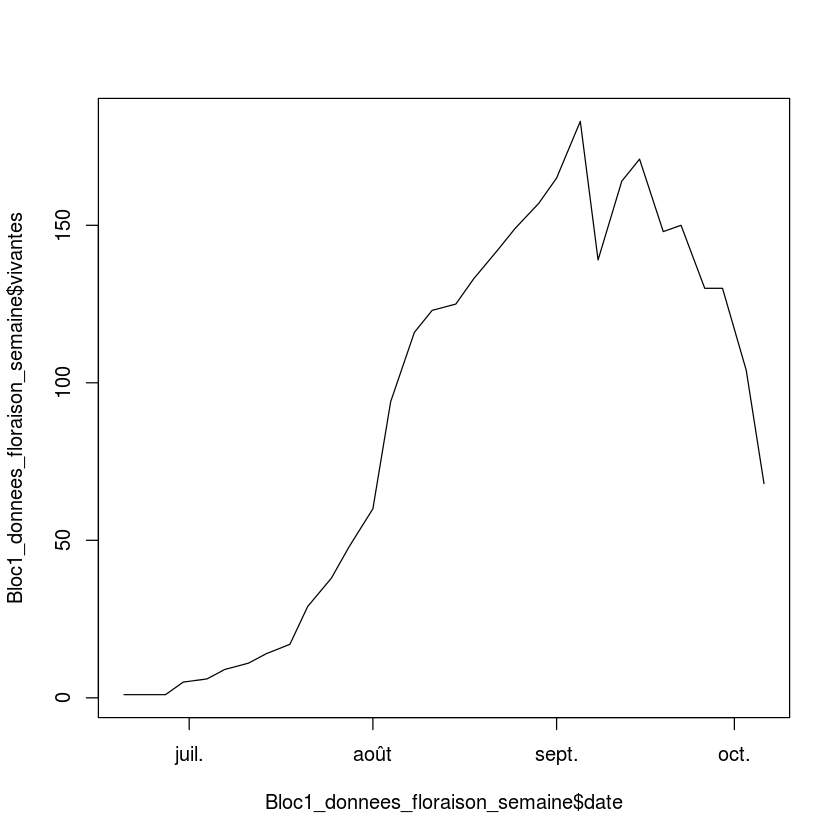

In [47]:
# BLOC 1_ Semaine
plot(Bloc1_donnees_floraison_semaine$date, Bloc1_donnees_floraison_semaine$vivantes,type='l')

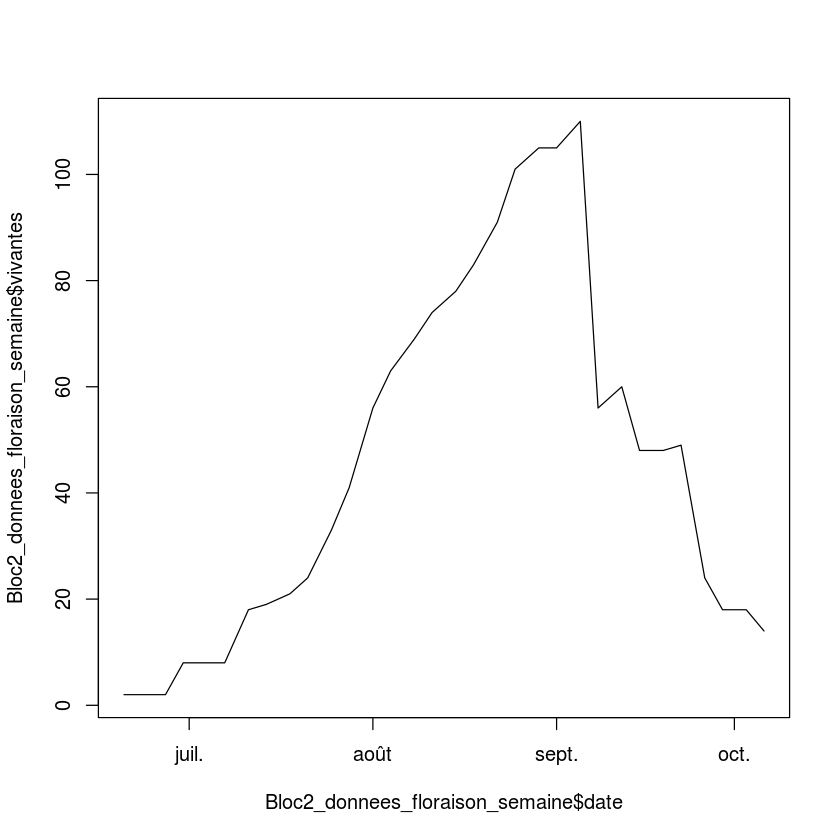

In [48]:
# BLOC 2_ Semaine
plot(Bloc2_donnees_floraison_semaine$date, Bloc2_donnees_floraison_semaine$vivantes,type='l')

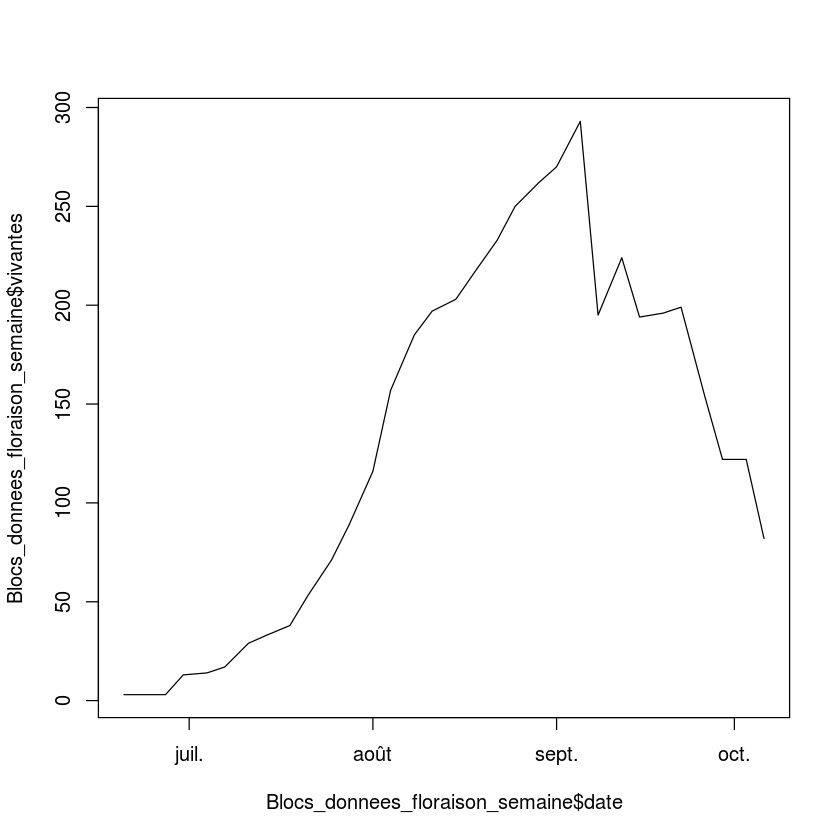

In [49]:
# BLOCS 1 et 2 _ Semaine
plot(Blocs_donnees_floraison_semaine$date, Blocs_donnees_floraison_semaine$vivantes,type='l')

### Pour les données floraison avec la courbe des mortes lissées

In [50]:
# La fonction suivante renvoie un dataframe et le met dans un fichier excel en estimant le nombre de larves piégées, 
# le nombre d'inflos vivantes et le nombre d'inflos mortes tous les jours

donnees_floraison_jour_bis = function (Bloc,Nom) {
    
    data = read.xlsx(paste0("../Fichiers de donnees/Donnees re organisees/Fichier donnees floraison/Avec lissage/",Nom,".xls"), sheetIndex=1)
    
    # On récupère les dates de relevés
    date_ = data$date
    
    # On rentre le nombre de jours entre chaque relevé
    nb_jours = array(0, length(date_)-1)
    for (i in 1:(length(date_)-1))
        nb_jours[i] = date_[i+1]-date_[i]
    
    # Initialisation
    diff = date_[length(date_)]-date_[1]

    alive = array(0, diff)
    dead  = array(0, diff)
    new   = array(0, diff)

    date = date_[1] + (0:diff)
    # On récupères les données pour chaque date de passage et on les transforme en données journalières

    alive[1] = data$alive[1]
    dead[1]  = data$dead[1]
    new[1]   = data$new[1]
    ii = 2
    for (i in 2:length(date)) {
        
        if (date[i] %in% date_) {
            alive[i] = data$alive[ii]
            dead[i]  = data$dead[ii]
            new[i]   = data$new[ii]
            ii = ii+1
        }
        
        else {
            alive[i] = alive[i-1]
            dead[i]  = dead[i-1]
        }
    }

    BB = data.frame(Bloc,alive,dead,new)
    
    write.xlsx(BB, paste0("../Fichiers de donnees/Donnees re organisees/Fichier donnees floraison/Avec lissage/",Nom,"_jour.xls"), sheetName="1")
    return (BB)
}

In [51]:
Bloc1_bache_donnees_floraison_jour_bis = donnees_floraison_jour_bis(Bloc1_bache_donnees_floraison_jour, "Bloc1_bache")
Bloc1_enh_haut_donnees_floraison_jour_bis = donnees_floraison_jour_bis(Bloc1_enh_haut_donnees_floraison_jour, "Bloc1_enh_haut")
Bloc1_enh_ras_donnees_floraison_jour_bis = donnees_floraison_jour_bis(Bloc1_enh_ras_donnees_floraison_jour, "Bloc1_enh_ras")

In [52]:
# La fonction suivante renvoie un dataframe et le met dans un fichier excel en estimant le nombre de larves piégées, 
# le nombre d'inflos vivantes et le nombre d'inflos mortes pour deux dates par semaine (le mardi et le vendredi)

donnees_floraison_semaine_bis = function (Bloc1, Bloc2, Nom) {
    
     # Arguments en entrée :
        ## Bloc : dataframe contenant les donnees aux dates de relevées
        ## Nom : Chaine de caractère pour choisir le nom du fichier excel sur lequel on écrit
    
    # On récupère les données du dataframe
    
    alive_jour = Bloc1$alive
    dead_jour = Bloc1$dead
    new_jour = Bloc1$new
    date = Bloc1$date
    
    # Dates qu'on impose, deux fois par semaine, le mardi et le vendredi
    date_ = c('20/06/2018','23/06/2018','27/06/2018','30/06/2018',
             '04/07/2018','07/07/2018','11/07/2018','14/07/2018','18/07/2018','21/07/2018','25/07/2018','28/07/2018',
             '01/08/2018','04/08/2018','08/08/2018','11/08/2018', '15/08/2018','18/08/2018','22/08/2018','25/08/2018','29/08/2018',
             '01/09/2018','05/09/2018','08/09/2018','12/09/2018','15/09/2018','19/09/2018','22/09/2018','26/09/2018','29/09/2018',
             '03/10/2018','06/10/2018')
    date_ = as.Date(date_, '%d/%m/%Y')
    date_ = as.Date(strptime(date_, format = "%Y-%m-%d"))
    
    debut = 1
    fin = length(date_)
    while (date_[debut]<date[1])
        debut = debut+1
    while (date_[fin]>date[length(date)])
        fin = fin-1
    date_ = date_[debut:fin]    
    
    nb_jours_ = c(0,rep(3:4,100),3)
    
    # Initialisation
    
    alive = array(0, length(date_))
    dead = array(0, length(date_))
    new = array(0, length(date_))
    
    for (i in 1:length(date_)) {
        C = which(date_[i]==date)
        alive[i] = alive_jour[C]
        dead[i]  = dead_jour[C]
        new[i]   = new_jour[C]
    }
    
    BB = data.frame(Bloc2, alive, dead, new)
    write.xlsx(BB, paste0("../Fichiers de donnees/Donnees re organisees/Fichier donnees floraison/Avec lissage/",Nom,"_semaine.xls"), sheetName="1")
    
    return (BB)
}

In [53]:
Bloc1_bache_donnees_floraison_semaine_bis = donnees_floraison_semaine_bis(Bloc1_bache_donnees_floraison_jour_bis, Bloc1_bache_donnees_floraison_semaine, "Bloc1_bache")
Bloc1_enh_haut_donnees_floraison_semaine_bis = donnees_floraison_semaine_bis(Bloc1_enh_haut_donnees_floraison_jour_bis, Bloc1_enh_haut_donnees_floraison_semaine, "Bloc1_enh_haut")
Bloc1_enh_ras_donnees_floraison_semaine_bis = donnees_floraison_semaine_bis(Bloc1_enh_ras_donnees_floraison_jour_bis, Bloc1_enh_ras_donnees_floraison_semaine, "Bloc1_enh_ras")

## Pour mettre à l'echelle du verger

In [54]:
donnees_floraison_verger = function (facteur, Nom) {
    
    data = read.xlsx(paste0("../Fichiers de donnees/Donnees re organisees/Fichier donnees floraison/Avec lissage/",Nom,".xls"), sheetIndex=1)
    
    date      = data$date
    nouvelles = round(facteur*data$nouvelles)
    vivantes  = round(facteur*data$vivantes)
    mortes    = round(facteur*data$mortes)
    alive     = round(facteur*data$alive)
    dead      = round(facteur*data$dead)
    new      = round(facteur*data$new)
    
    BB = data.frame(date, nouvelles, vivantes, mortes, alive, dead, new)
    write.xlsx(BB, paste0("../Fichiers de donnees/Donnees re organisees/Fichier donnees floraison/Avec lissage/Verger/",Nom,".xls"), sheetName="1")
}

In [55]:
donnees_floraison_verger(44.14,"Bloc1_bache_semaine")
donnees_floraison_verger(43.97,"Bloc1_bache_jour")

donnees_floraison_verger(37.76,"Bloc1_enh_haut_semaine")
donnees_floraison_verger(37.92,"Bloc1_enh_haut_jour")

donnees_floraison_verger(62.39,"Bloc1_enh_ras_semaine")
donnees_floraison_verger(61.47,"Bloc1_enh_ras_jour")

## Pour coupler les donnees des fichiers pieges et donnees floraison

In [56]:
donnees_floraison_piege = function (Nom) {
    
    data1 = read.xlsx(paste0("../Fichiers de donnees/Donnees re organisees/Fichier donnees floraison/Avec lissage/Verger/",Nom,".xls"), sheetIndex=1)
    data2 = read.xlsx(paste0("../Fichiers de donnees/Donnees re organisees/Fichier piege/",Nom,".xls"), sheetIndex=1)
    
    date1 = data1$date
    date2 = data2$date
    
    for (i in 1:length(date1)) {
        year(date1[i]) = 2017
    }
    
    date = date1
    
    ii = which(date2[1]==date1)
    
    nouvelles_floraison = data1$new
    
    larves_piege = array(0, length(date1))
    larves_piege[ii:length(date1)] = data2$larves
    
    inflos_vivantes_piege = array(0, length(date1))
    inflos_vivantes_piege[ii:length(date1)] = data2$inflos_vivantes
    inflos_vivantes_floraison = data1$alive
    
    inflos_mortes_piege = array(0, length(date1))
    inflos_mortes_piege[ii:length(date1)] = data2$inflos_mortes
    inflos_mortes_floraison = data1$dead
    
    BB = data.frame(date, larves_piege, nouvelles_floraison, inflos_vivantes_piege, inflos_vivantes_floraison, inflos_mortes_piege, inflos_mortes_floraison)
    write.xlsx(BB, paste0("../Fichiers de donnees/Donnees re organisees/Simulation/",Nom,".xls"), sheetName="1")
}

In [57]:
donnees_floraison_piege("Bloc1_bache_semaine")
donnees_floraison_piege("Bloc1_bache_jour")

donnees_floraison_piege("Bloc1_enh_haut_semaine")
donnees_floraison_piege("Bloc1_enh_haut_jour")

donnees_floraison_piege("Bloc1_enh_ras_semaine")
donnees_floraison_piege("Bloc1_enh_ras_jour")